In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import ta
import warnings
from datetime import datetime

In [2]:
import joblib

In [3]:
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [4]:
nse_stocks = [
    "RELIANCE.NS",   # Reliance Industries Limited
    "TCS.NS",        # Tata Consultancy Services
    "HDFCBANK.NS",   # HDFC Bank Limited
    "INFY.NS",       # Infosys Limited
    "ICICIBANK.NS",  # ICICI Bank Limited
    "KOTAKBANK.NS",  # Kotak Mahindra Bank Limited
    "HINDUNILVR.NS", # Hindustan Unilever Limited
    "LT.NS",         # Larsen & Toubro Limited
    "SBIN.NS",       # State Bank of India
    "BHARTIARTL.NS", # Bharti Airtel Limited
    "ITC.NS",        # ITC Limited
    "BAJFINANCE.NS", # Bajaj Finance Limited
    "AXISBANK.NS",   # Axis Bank Limited
    "HCLTECH.NS",    # HCL Technologies Limited
    "MARUTI.NS",     # Maruti Suzuki India Limited
    "M&M.NS",        # Mahindra & Mahindra Limited
    "ASIANPAINT.NS", # Asian Paints Limited
    "NESTLEIND.NS",  # Nestlé India Limited
    "ULTRACEMCO.NS", # UltraTech Cement Limited
    "SUNPHARMA.NS",  # Sun Pharmaceutical Industries Limited
    "TITAN.NS",      # Titan Company Limited
    "DRREDDY.NS",    # Dr. Reddy's Laboratories Limited
    "WIPRO.NS",      # Wipro Limited
    "ADANIPORTS.NS", # Adani Ports and Special Economic Zone Limited
    "POWERGRID.NS",  # Power Grid Corporation of India Limited
    "GRASIM.NS",     # Grasim Industries Limited
    "NTPC.NS",       # NTPC Limited
    "ONGC.NS",       # Oil and Natural Gas Corporation Limited
    "INDUSINDBK.NS", # IndusInd Bank Limited
    "BAJAJFINSV.NS"  # Bajaj Finserv Limited
]

In [5]:
start_date = "2015-01-01"
end_date = str(datetime.now().date())

dfs = {}

In [6]:
for ticker in nse_stocks:
    df = yf.download(ticker, start=start_date, end=end_date)
    df.reset_index(inplace=True)
    dfs[ticker] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
for ticker in nse_stocks:
    dfs[ticker] = dfs[ticker][['Date', 'Close']]

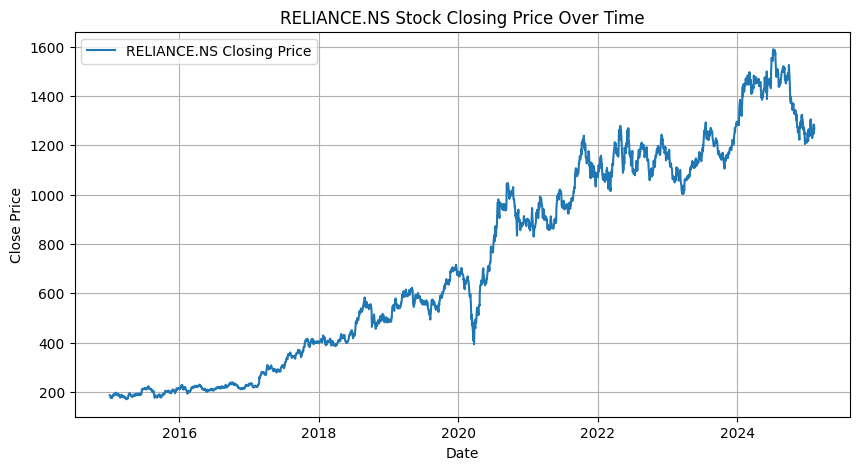

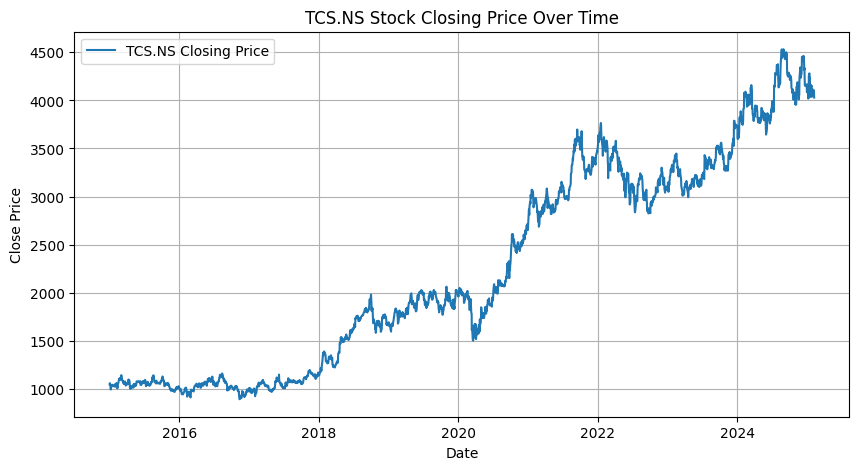

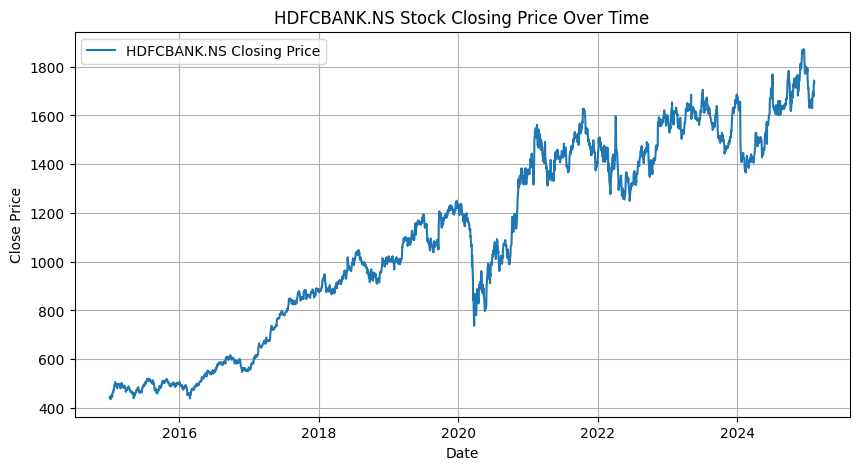

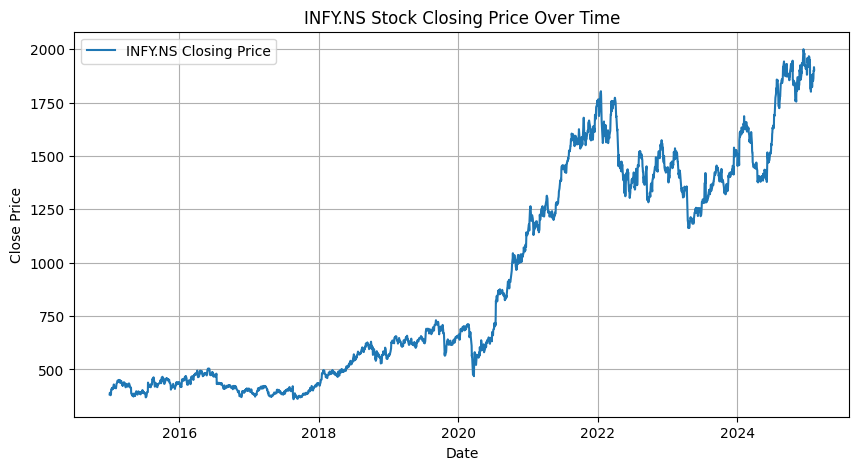

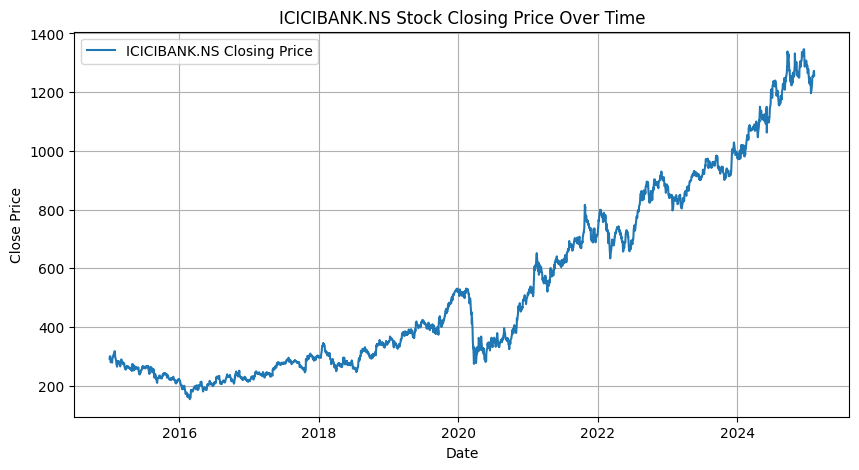

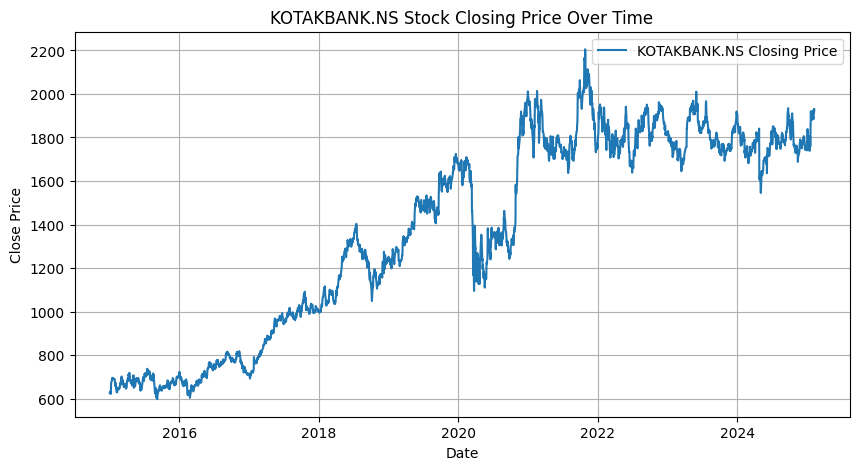

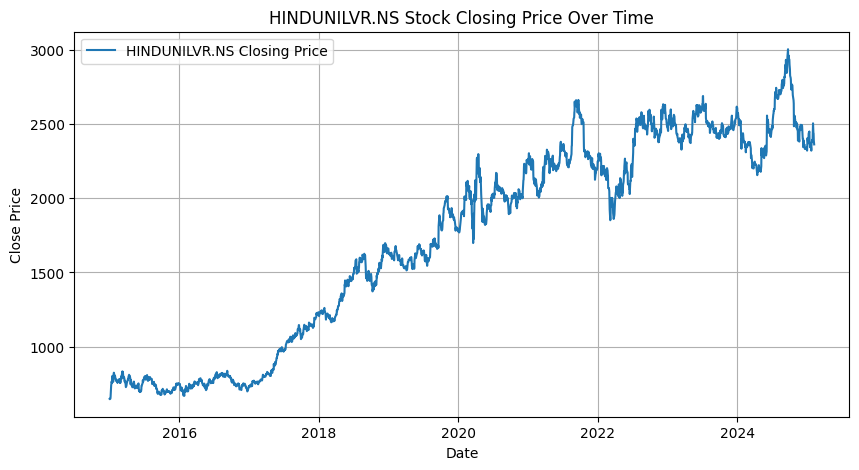

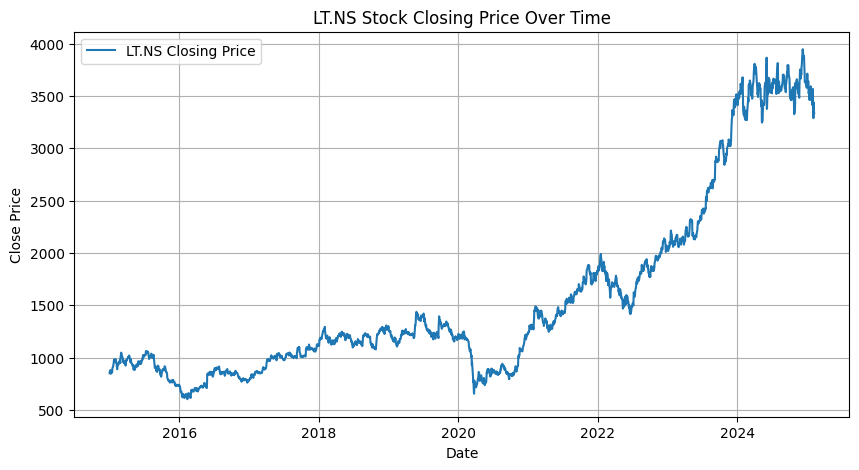

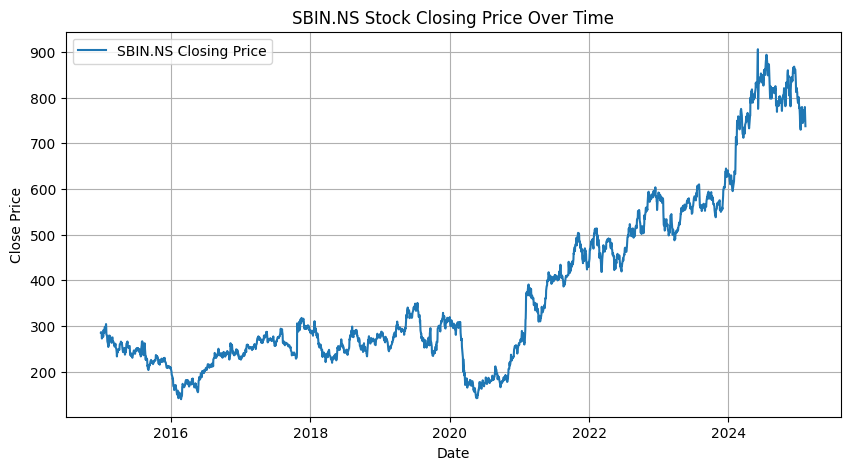

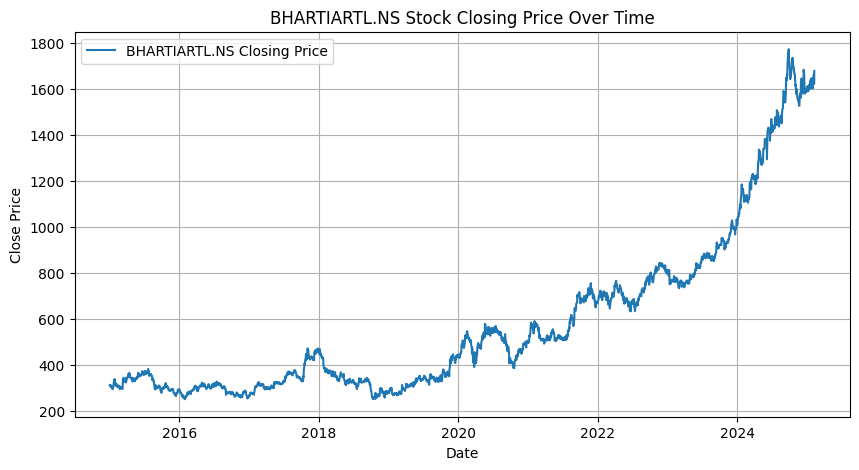

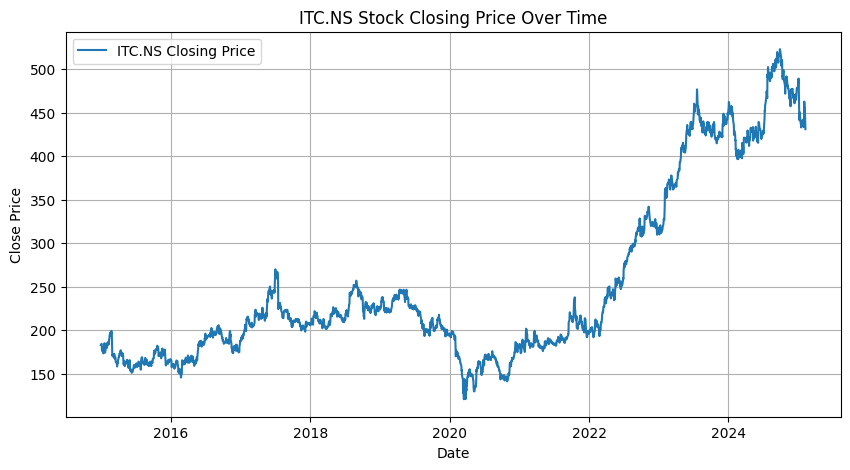

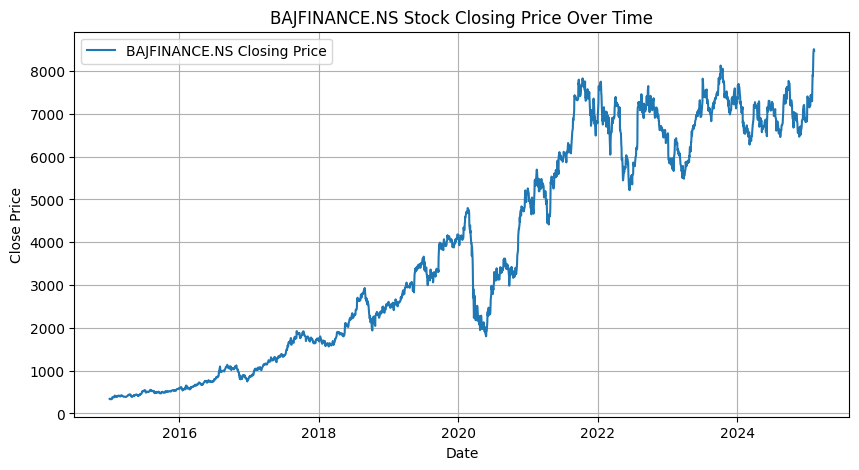

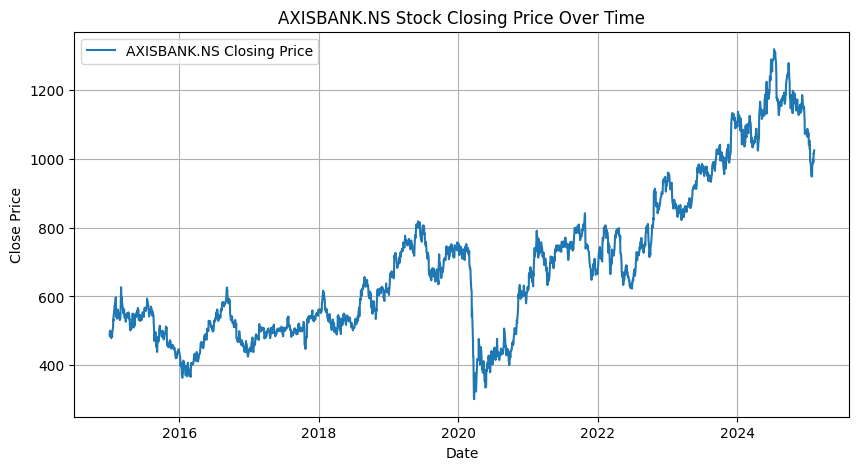

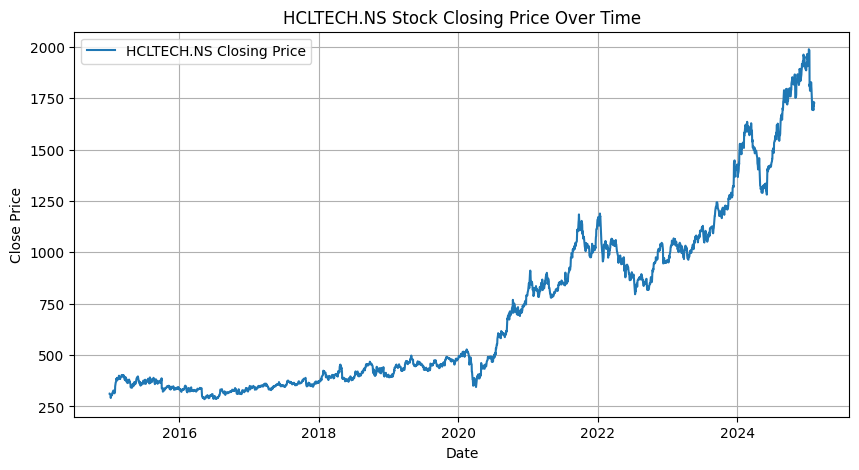

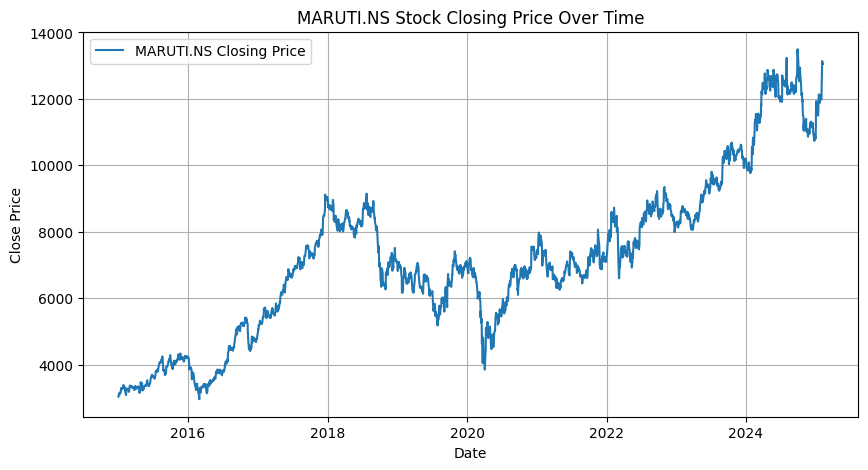

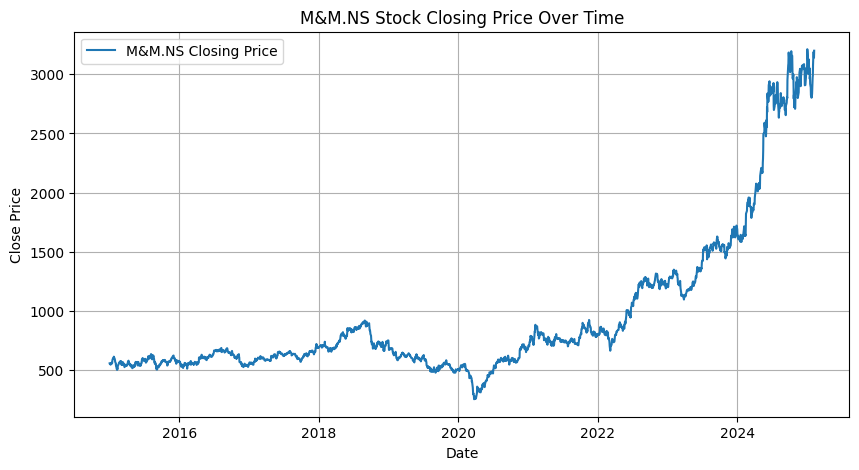

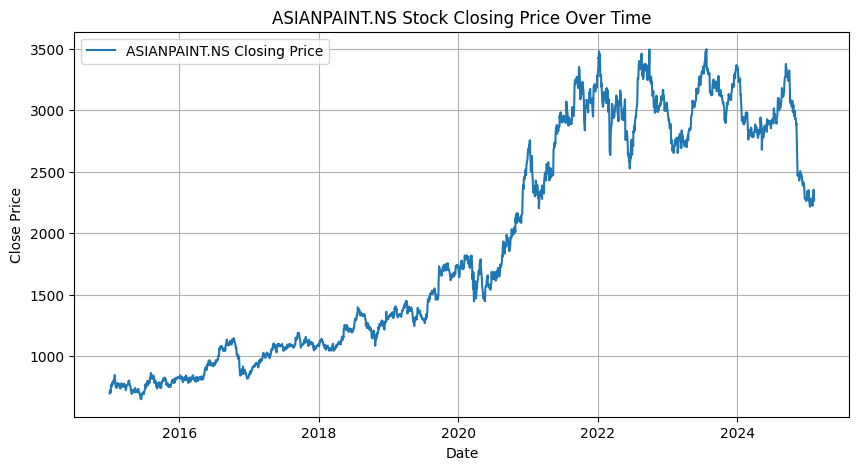

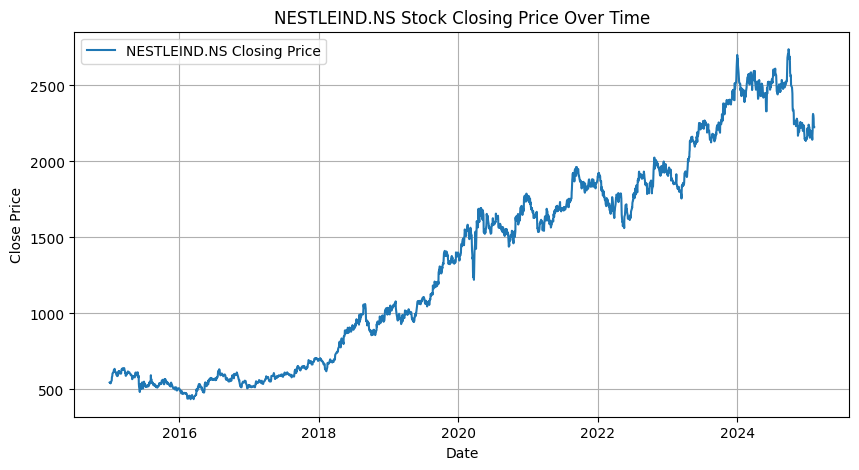

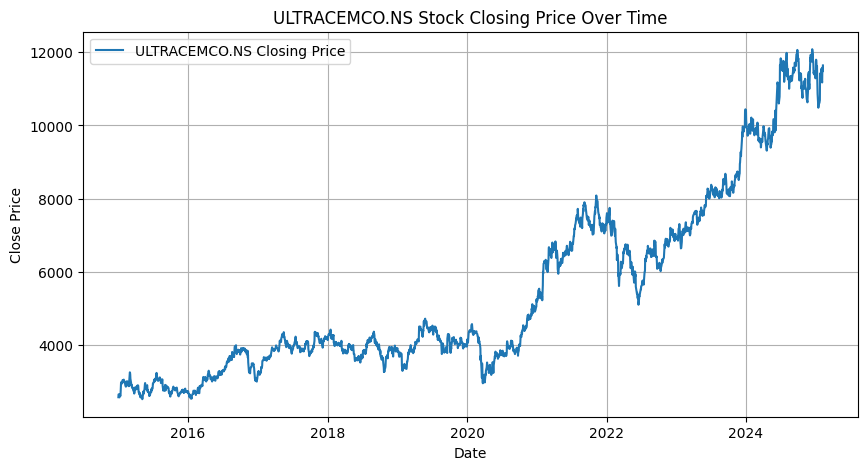

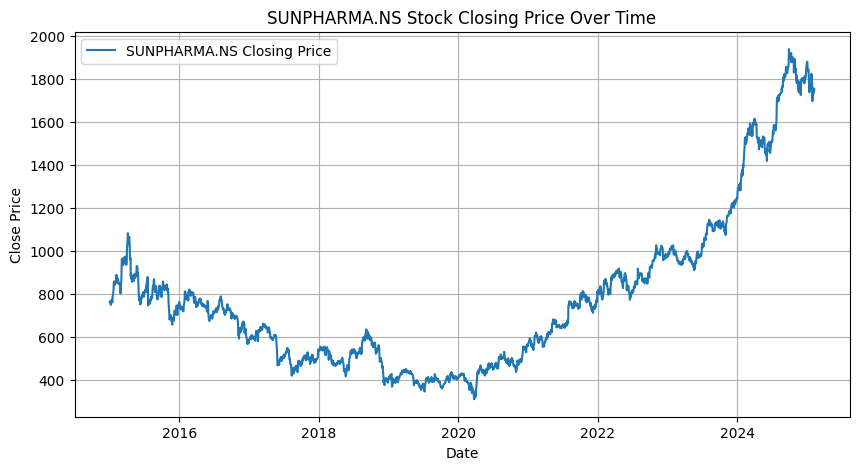

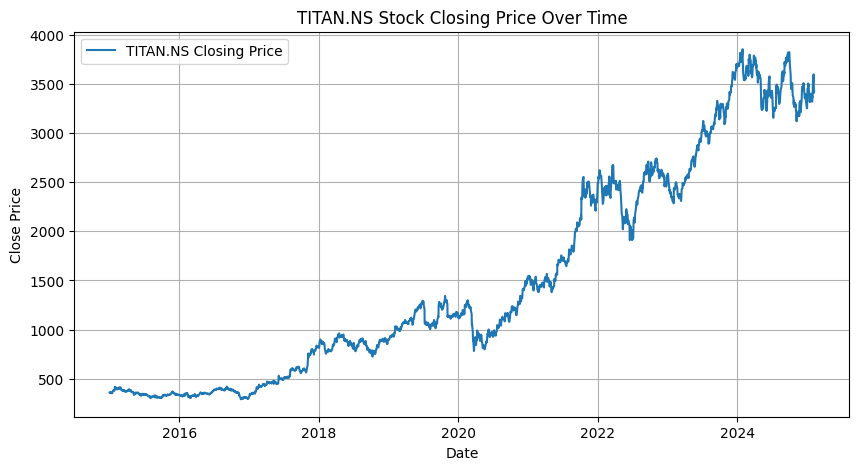

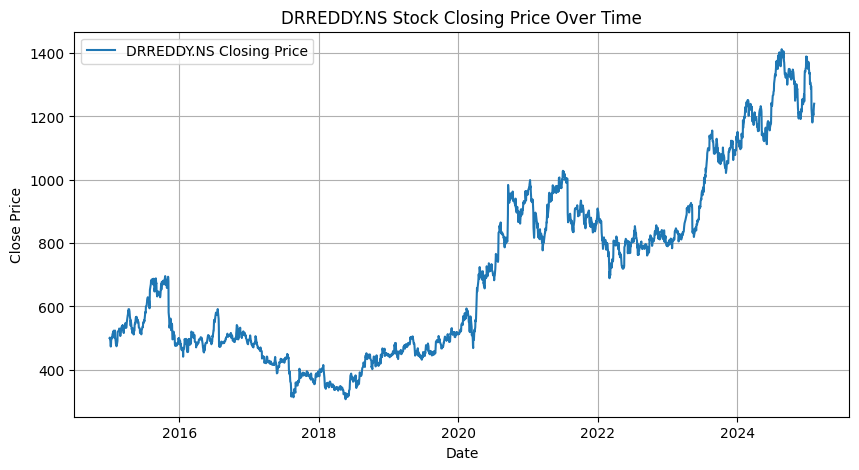

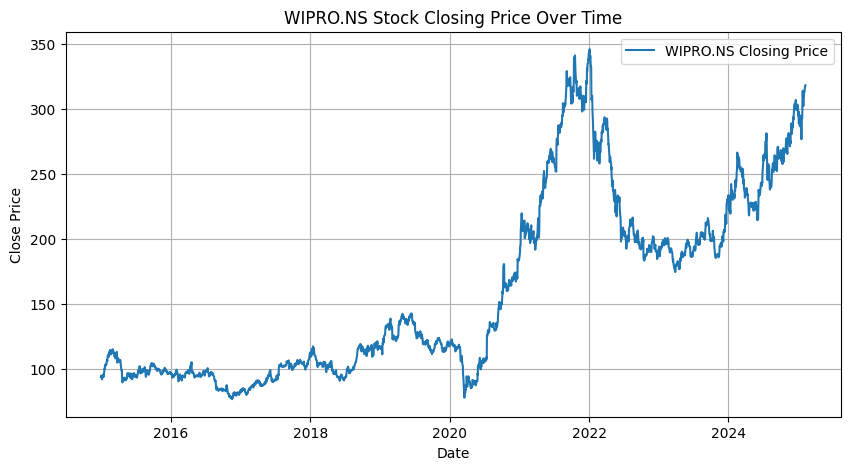

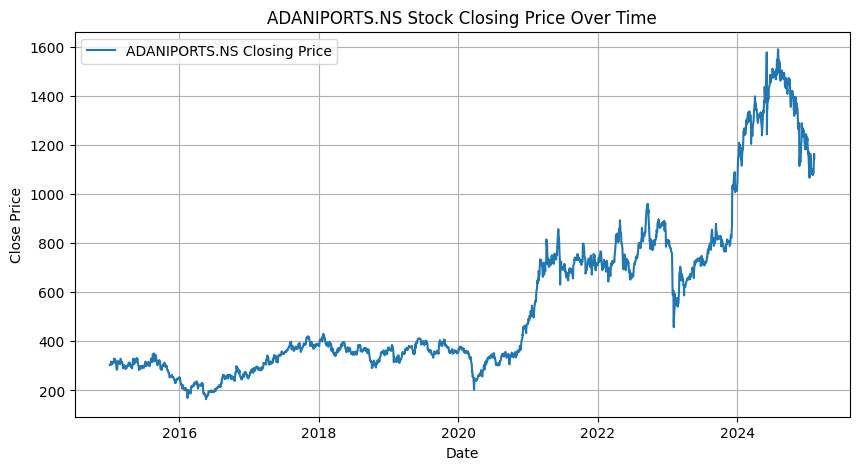

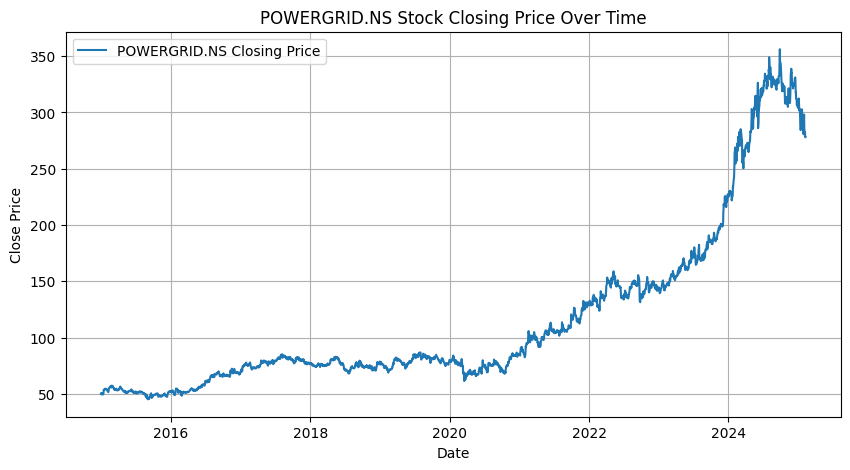

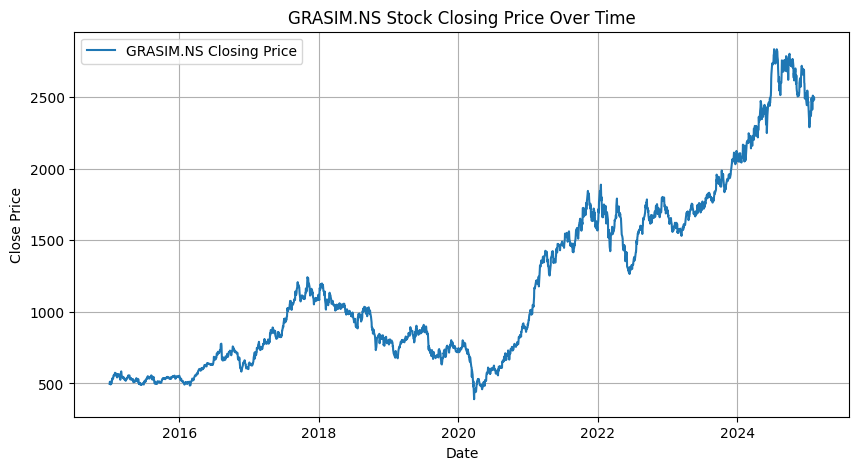

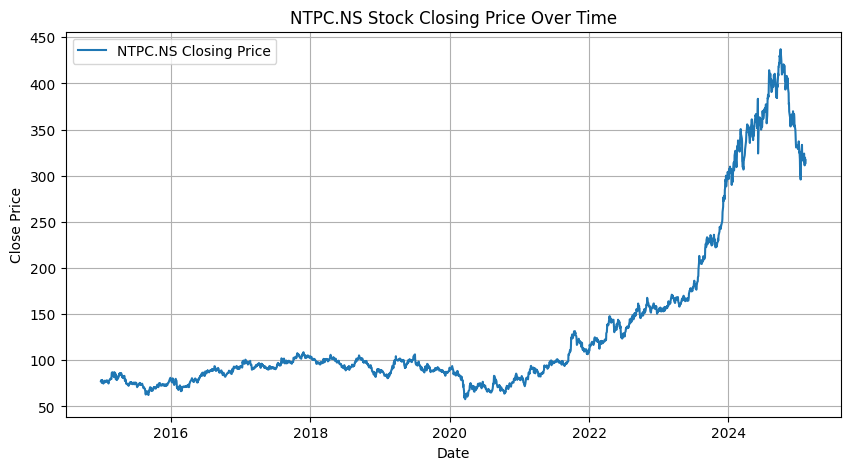

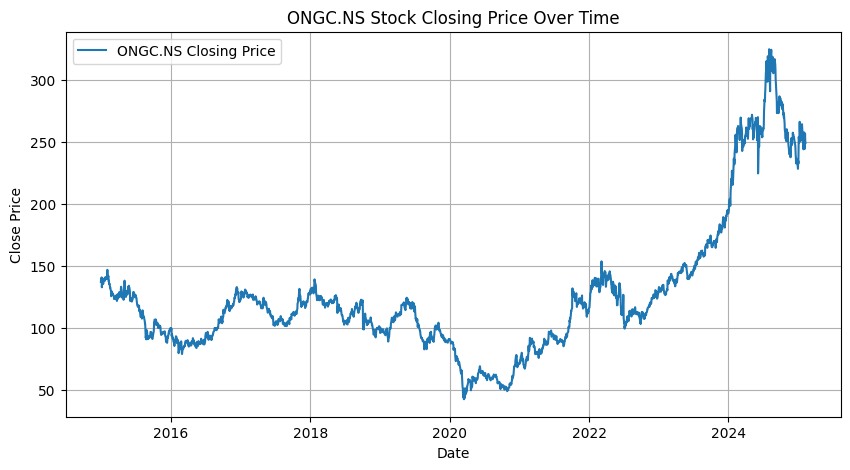

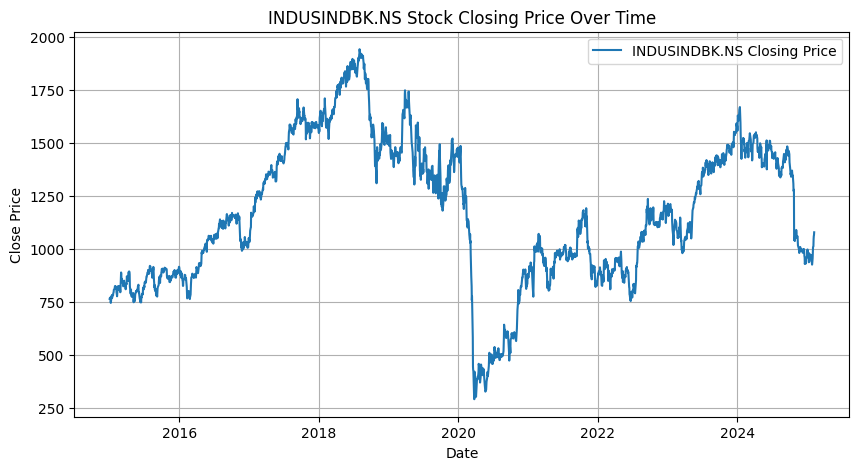

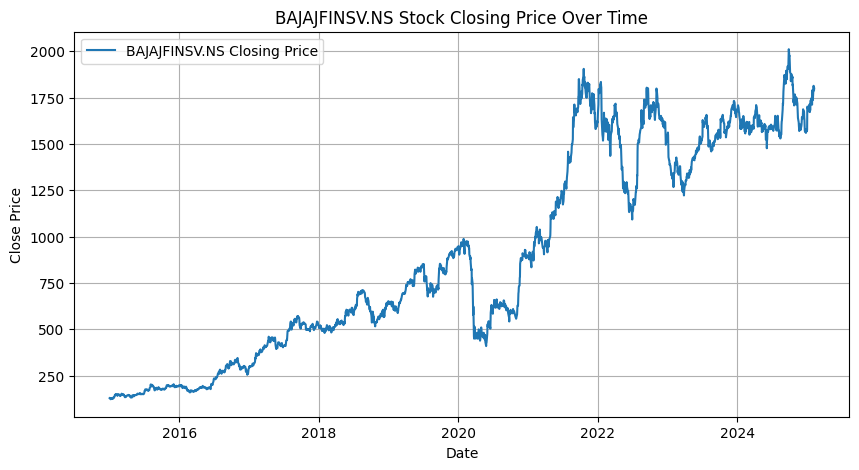

In [8]:
for ticker in nse_stocks:
    plt.figure(figsize=(10,5))
    plt.plot(dfs[ticker]['Date'], dfs[ticker]['Close'], label=f"{ticker} Closing Price")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.title(f"{ticker} Stock Closing Price Over Time")
    plt.legend()
    plt.grid()
    plt.show()

In [8]:
#SMA: Simple Moving Average, which is a technical indicator that calculates the average price of a stock over a given period of time.

SMA_WINDOW = 10

for ticker in nse_stocks:
    dfs[ticker]['SMA'] = dfs[ticker]['Close'].rolling(window=SMA_WINDOW).mean()

C:\Users\Soham Mandavkar\AppData\Local\Temp\ipykernel_44028\1045395035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[ticker]['SMA'] = dfs[ticker]['Close'].rolling(window=SMA_WINDOW).mean()


In [9]:
#RSI: Relative Strength Index, a technical indicator used to assess the strength of a stock or other financial instrument.

import ta

RSI_WINDOW = 14

for ticker in nse_stocks:
    dfs[ticker]['RSI'] = ta.momentum.rsi(dfs[ticker]['Close'].squeeze(), window=RSI_WINDOW)

C:\Users\Soham Mandavkar\AppData\Local\Temp\ipykernel_44028\3120763740.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[ticker]['RSI'] = ta.momentum.rsi(dfs[ticker]['Close'].squeeze(), window=RSI_WINDOW)


In [11]:
dfs["RELIANCE.NS"].head(15)

Price,Date,Close,SMA,RSI
Ticker,,RELIANCE.NS,,
0,2015-01-01,186.026642,NaN,NaN
1,2015-01-02,185.534256,NaN,NaN
2,2015-01-05,183.502029,NaN,NaN
3,2015-01-06,175.173843,NaN,NaN
4,2015-01-07,178.987000,NaN,NaN
5,2015-01-08,176.420456,NaN,NaN
6,2015-01-09,180.244080,NaN,NaN
7,2015-01-12,178.148972,NaN,NaN
8,2015-01-13,176.650940,NaN,NaN


In [10]:
for ticker in nse_stocks:
    dfs[ticker] = dfs[ticker].iloc[14:]
    dfs[ticker].reset_index(drop=True, inplace=True)

In [13]:
dfs["RELIANCE.NS"].head(15)

Price,Date,Close,SMA,RSI
Ticker,,RELIANCE.NS,,
0,2015-01-21,189.975937,181.315744,63.706280
1,2015-01-22,185.157166,182.189415,53.090734
2,2015-01-23,185.817123,182.746719,54.215957
3,2015-01-27,186.267609,183.558583,55.009284
4,2015-01-28,189.996918,184.893181,61.029433
5,2015-01-29,194.721436,186.872032,67.045502
6,2015-01-30,191.756821,187.940547,60.711971
7,2015-02-02,190.248322,188.744028,57.723884
8,2015-02-03,196.439484,189.958159,65.277311


In [12]:
X_data = {}
y_data = {}

WINDOW_SIZE = 30

for ticker in nse_stocks:
    stock_data = dfs[ticker][['Close', 'SMA', 'RSI']].values
    
    X_data[ticker] = []  # List to store sequences
    y_data[ticker] = []  # List to store labels
    
    # Generate all possible 30-day sequences
    for i in range(len(stock_data) - WINDOW_SIZE):
        X_data[ticker].append(stock_data[i:i + WINDOW_SIZE])  # Store past 30 days
        y_data[ticker].append(stock_data[i + WINDOW_SIZE, 0])  # Store next day Close price

    # Convert lists to NumPy arrays
    X_data[ticker] = np.array(X_data[ticker])
    y_data[ticker] = np.array(y_data[ticker])

# Check structure
print(f"X_data['RELIANCE.NS'] shape: {X_data['RELIANCE.NS'].shape}")
print(f"y_data['RELIANCE.NS'] shape: {y_data['RELIANCE.NS'].shape}")

X_data['RELIANCE.NS'] shape: (2452, 30, 3)
y_data['RELIANCE.NS'] shape: (2452,)


In [14]:
def build_model(units=50, dropout=0.2, learning_rate=0.001, num_features=33):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(30, num_features)),  # To accepts 33 features
        Dropout(dropout),
        LSTM(units, return_sequences=False),
        Dropout(dropout),
        Dense(1)  # Predicting next day's Close price
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss='mean_squared_error')
    return model


In [19]:
regressor = KerasRegressor(model=build_model, model__num_features=33, verbose=0)

In [20]:
param_grid = {
    'model__units': [20, 30],  # Units for LSTM layers
    'model__dropout': [0.2],  # Dropout rates
    'batch_size': [16, 32],  # Batch sizes for training
    'epochs': [30, 50],  # Number of epochs
}

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# This dictionary will hold grid search results for each stock and the best model
grid_search_results = {}
best_models = {}

In [ ]:
for ticker in X_data.keys():
    print(f"Processing stock: {ticker}")
    
    X = X_data[ticker]
    y = y_data[ticker]
    
    # Create a new instance of the KerasRegressor for this grid search run
    regressor = KerasRegressor(model=build_model, verbose=0)
    
    # Set up GridSearchCV for the current stock
    grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=2, n_jobs=1, verbose=2)
    
    # Fit GridSearchCV while passing the early stopping callback
    grid_result = grid.fit(X, y, callbacks=[early_stopping])    
    
    # Save the best model for this stock
    best_models[ticker] = grid_result.best_estimator_
    
    print(f"Best hyperparameters for {ticker}: {grid_result.best_params_}")
    print(f"Best CV score (loss) for {ticker}: {grid_result.best_score_}\n")

Processing stock: RELIANCE.NS
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END batch_size=16, epochs=30, model__dropout=0.2, model__units=20; total time=  47.2s
[CV] END batch_size=16, epochs=30, model__dropout=0.2, model__units=20; total time=  42.6s
[CV] END batch_size=16, epochs=30, model__dropout=0.2, model__units=30; total time=  28.8s
[CV] END batch_size=16, epochs=30, model__dropout=0.2, model__units=30; total time=  27.3s
[CV] END batch_size=16, epochs=50, model__dropout=0.2, model__units=20; total time=  43.1s
[CV] END batch_size=16, epochs=50, model__dropout=0.2, model__units=20; total time=  44.9s
[CV] END batch_size=16, epochs=50, model__dropout=0.2, model__units=30; total time= 1.0min
[CV] END batch_size=16, epochs=50, model__dropout=0.2, model__units=30; total time= 1.2min
[CV] END batch_size=32, epochs=30, model__dropout=0.2, model__units=20; total time=  27.5s
[CV] END batch_size=32, epochs=30, model__dropout=0.2, model__units=20; total time=  17.9s


In [24]:
joblib.dump(best_models, 'best_models.pkl')
print("Models have been saved to 'best_models.pkl'.")

INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpumahymya\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpumahymya\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpgqy3so7u\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpgqy3so7u\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpk4ve3s9o\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpk4ve3s9o\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp1ids_hib\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp1ids_hib\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpd6dlturj\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpd6dlturj\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpd0uj77lw\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpd0uj77lw\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmptgbpaiop\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmptgbpaiop\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpcgxjhkzs\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpcgxjhkzs\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpp3m52giw\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpp3m52giw\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp823sueya\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp823sueya\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpeqr9khnr\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpeqr9khnr\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpb_e9ksp5\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpb_e9ksp5\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpw4x0dk4z\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpw4x0dk4z\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpb4i0xibe\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpb4i0xibe\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp_o2f1qzy\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp_o2f1qzy\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmppbhlkhek\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmppbhlkhek\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpcwt6sc0e\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpcwt6sc0e\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpaksimtfo\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpaksimtfo\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp1b1sgfft\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp1b1sgfft\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp51890qt2\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp51890qt2\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpipja0il0\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpipja0il0\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpncrhayx6\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpncrhayx6\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpdyn3rjx4\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpdyn3rjx4\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp2wquyr5p\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp2wquyr5p\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpxzejt2ni\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpxzejt2ni\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpqfv54sue\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpqfv54sue\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpxnr76zk9\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpxnr76zk9\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpc0unm5rs\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpc0unm5rs\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpf9de9_fz\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmpf9de9_fz\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp5qquaeo3\assets


INFO:tensorflow:Assets written to: C:\Users\SOHAMM~1\AppData\Local\Temp\tmp5qquaeo3\assets


Models have been saved to 'best_models.pkl'.


In [15]:
best_models = joblib.load('best_models_old.pkl')

In [16]:
def compute_SMA(closes):
     return np.mean(closes)

def compute_RSI(prices, period=14):
    deltas = np.diff(prices)
    if len(deltas) < period:
        # Not enough data for a full period; return a default value (or compute on available data)
        return 50.0  # neutral value
    seed = deltas[:period]
    up = seed[seed > 0].sum() / period
    down = -seed[seed < 0].sum() / period
    rs = up / down if down != 0 else 0
    rsi = 100 - 100 / (1 + rs)
    return rsi


In [17]:
def update_window(window, new_close):
    closes = window[:, 0]
    new_closes = np.append(closes[1:], new_close)
    new_SMA = compute_SMA(new_closes)
    new_RSI = compute_RSI(new_closes, period=14)
    new_row = np.array([new_close, new_SMA, new_RSI])
    new_window = np.vstack((window[1:], new_row))
    return new_window

In [19]:
def predict_next_n_days(ticker, n_days, best_models, X_data):
    if ticker not in best_models:
        print(f"No trained model found for {ticker}.")
        return None

    # Retrieve the trained model for the ticker.
    model = best_models[ticker]
    
    # Get the most recent available window for this stock.
    current_window = X_data[ticker][-1]  # Shape: (WINDOW_SIZE, 3)
    
    predictions = []
    for _ in range(n_days):
        X_input = np.expand_dims(current_window, axis=0)  # Shape: (1, WINDOW_SIZE, 3)
        predicted = model.predict(X_input)
        
        # Determine predicted_close based on the dimensions of the prediction
        if np.ndim(predicted) == 1:
            # predicted shape is (batch_size,), so take the first element.
            predicted_close = predicted[0]
        elif np.ndim(predicted) == 2:
            # predicted shape is (batch_size, 1), so take [0][0]
            predicted_close = predicted[0][0]
        else:
            raise ValueError("Unexpected shape of prediction output:", predicted.shape)
        
        predictions.append(predicted_close)
        current_window = update_window(current_window, predicted_close)
    
    return predictions

# Example usage:
n_days_to_predict = 30
predicted_prices = predict_next_n_days('RELIANCE.NS', n_days_to_predict, best_models, X_data)

print("Predicted closing prices for the next 30 days for RELIANCE.NS:")
for i, price in enumerate(predicted_prices, start=1):
    print(f"Day {i}: {price:.2f}")


Predicted closing prices for the next 30 days for RELIANCE.NS:
Day 1: 102.98
Day 2: 102.98
Day 3: 102.98
Day 4: 102.98
Day 5: 102.98
Day 6: 102.98
Day 7: 102.98
Day 8: 102.98
Day 9: 102.98
Day 10: 102.98
Day 11: 102.97
Day 12: 102.97
Day 13: 102.97
Day 14: 102.97
Day 15: 102.97
Day 16: 102.97
Day 17: 102.97
Day 18: 102.96
Day 19: 102.95
Day 20: 102.94
Day 21: 102.92
Day 22: 102.91
Day 23: 102.89
Day 24: 102.88
Day 25: 102.87
Day 26: 102.88
Day 27: 102.89
Day 28: 102.91
Day 29: 102.92
Day 30: 102.91
